In [43]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [44]:
data = pd.read_csv('loan_pred.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1.0,Urban,Y


In [45]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Male'

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smote = SMOTETomek(0.90)

In [46]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,613.000000
mean,5403.459283,1621.245798,148.925081,341.511401,0.817292
std,6109.041673,2926.248369,91.582842,63.806976,0.386743
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.750000,360.000000,1.000000
max,81000.000000,41667.000000,765.000000,480.000000,1.000000


In [47]:
y=data['LoanAmount']
x=data.drop(columns=['LoanAmount'],axis=1)

In [48]:
x_bal,y_bal=smote.fit_resample(x,y)

NameError: name 'smote' is not defined

In [49]:
print(y.value_counts())
print(y_bal.value_counts())

120    21
110    17
100    15
187    12
160    12
       ..
244     1
265     1
54      1
78      1
253     1
Name: LoanAmount, Length: 211, dtype: int64


NameError: name 'y_bal' is not defined

In [50]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,613.000000
mean,5403.459283,1621.245798,148.925081,341.511401,0.817292
std,6109.041673,2926.248369,91.582842,63.806976,0.386743
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.750000,360.000000,1.000000
max,81000.000000,41667.000000,765.000000,480.000000,1.000000


C:\Users\hasmaAbdulrub\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hasmaAbdulrub\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


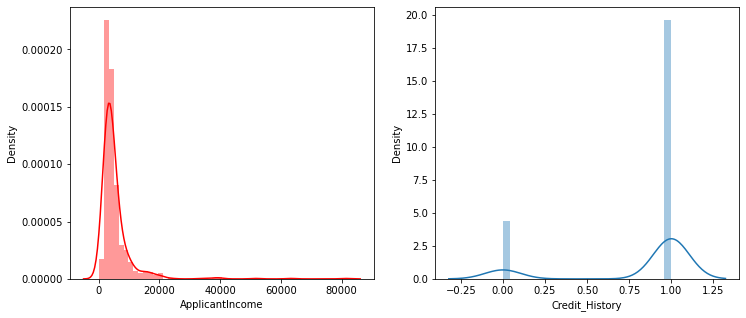

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

C:\Users\hasmaAbdulrub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hasmaAbdulrub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hasmaAbdulrub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

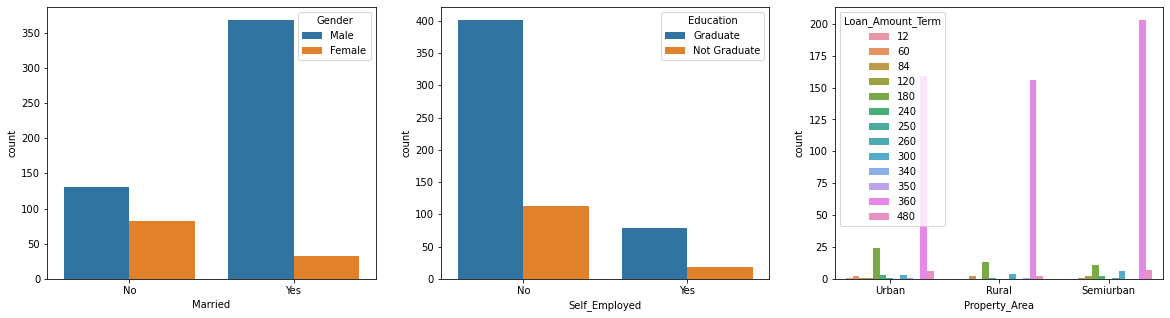

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])

In [55]:
sns.Swarmplot(data['CoapplicantIncome'],data['ApplicantIncome'], hue=data['LoanAmount'])

AttributeError: module 'seaborn' has no attribute 'Swarmplot'

In [56]:
def decisionTree(x_train, x_test, y_train, y_test)
dt=decisionTreeClassifier()
dt.fit(x_train,y_train)
ypred=dt.predict(x_test)
print('***DecisionTreeClassifier***')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report(y_test,yPred))

SyntaxError: invalid syntax (3926797144.py, line 1)

In [57]:
def randomForest(x_train, x_test, y_train, y_test):
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)
print('***RandomForestClassifier***')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report(y_test,yPred))


IndentationError: expected an indented block (801442583.py, line 2)

In [58]:
def KNN(x_train, x_test, y_train, y_test):
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
print('***DecisionTreeClassifier***')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report(y_test,yPred))

IndentationError: expected an indented block (2404230115.py, line 2)

In [59]:
def xgboost(x_train, x_test, y_train, y_test):
xg=GradientBoostingClassifier()
xg.fit(x_train,y_train)
ypred=xg.predict(x_test)
print('***GradientBoostingClassifier***')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report(y_test,yPred))

IndentationError: expected an indented block (1926875431.py, line 2)

In [60]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [61]:
Classifier = Sequential()

NameError: name 'Sequential' is not defined

In [62]:
Classifier.add(Dense(units=100, activation='relu',input_dim=11))

NameError: name 'Classifier' is not defined

In [63]:
Classifier.add(Dense(units=50, activation='relu'))

NameError: name 'Classifier' is not defined

In [64]:
Classifier.add(Dense(units=1, activation='sigmoid'))                        

NameError: name 'Classifier' is not defined

In [65]:
Classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

NameError: name 'Classifier' is not defined

In [66]:
model_history = Classifier.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=100)

NameError: name 'Classifier' is not defined